#  <span style="color:red">**Movie Recommendation System**</span>

## Dataset: [The Indian Movie Database](https://www.kaggle.com/pncnmnp/the-indian-movie-database?select=collaborative)

## <span style="color:blue">*Importing library*</span>

##### numpy : A library used to manipulate multi-dimensional data in the form of numpy arrays with useful in-built functions.
##### pandas : An open source library used for data manipulation, cleaning, analysis and visualization.
##### matplotlib : A library used for plotting and visualization of data.
##### seaborn : A library based on matplotlib which is used for plotting of data.
##### tikinter:A library used to making interface

In [1]:
# importing all librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tkinter as tk



### Read the data from the The indian movie dataset using the read_csv() function from the pandas library.

In [19]:
df=pd.read_csv("collaborative/movie_rating.csv",encoding='utf-8')
mv=pd.read_csv("collaborative/titles.csv",encoding='utf-8')

### Showing shapes of  both file

In [20]:
print(df.shape)
print(mv.shape)

(17604, 4)
(788, 2)


### Showing top 5 rows of both data frame

In [21]:
print(df.head(5))
print(mv.head(5))

   user_id  movie_id  rating   timestamp
0      172     94969     5.0  1396067836
1      172     98956     4.0  1396067879
2      176     73881     4.0  1499807147
3      221      1900     4.5  1288550866
4      333     33688     4.0  1412015122
   movie_id                                              title
0       139                                      Target (1995)
1       568                          Bhaji on the Beach (1993)
2      1900  Children of Heaven  The (Bacheha-Ye Aseman) (1...
3      2284                                Bandit Queen (1994)
4      5985                    Asoka (Ashoka the Great) (2001)


In [25]:
df.head()

,user_id,movie_id,rating
0,172,94969,5.0
1,172,98956,4.0
2,176,73881,4.0
3,221,1900,4.5
4,333,33688,4.0


### Elemenating Unwanted coloumn

In [26]:
df=df[["user_id","movie_id","rating"]]

In [27]:
df.head(5)

,user_id,movie_id,rating
0,172,94969,5.0
1,172,98956,4.0
2,176,73881,4.0
3,221,1900,4.5
4,333,33688,4.0


### Checking unique user and movie name

In [28]:
print(df["user_id"].nunique())
print(df["movie_id"].nunique())

5667
779


## Merging Two data frame df and mv using pandas merge  funcation on movieId

In [29]:
df=pd.merge(df,mv,on="movie_id")
df.shape

(17604, 4)

In [30]:
df.dtypes # printing heading

user_id       int64
movie_id      int64
rating      float64
title        object
dtype: object

###  Checking merge data frame

In [31]:
df.head(5)

,user_id,movie_id,rating,title
0,172,94969,5.0,Kahaani (2012)
1,2419,94969,3.0,Kahaani (2012)
2,9168,94969,1.0,Kahaani (2012)
3,9303,94969,3.0,Kahaani (2012)
4,9535,94969,4.0,Kahaani (2012)


In [32]:
df.tail(5)

,user_id,movie_id,rating,title
17599,263047,176249,3.5,Mom (2017)
17600,272748,176249,3.5,Mom (2017)
17601,271060,192515,4.5,Ramaiya Vastavaiya (2013)
17602,271113,186637,2.0,Bobby Jasoos (2014)
17603,280887,164443,1.0,Freaky Ali (2016)


### merging data frame  susscesful

# Exploratory data analysis

## Getting avg rating's of the movies in separate coloumn

In [33]:
df.groupby('title').mean()['rating'].sort_values(ascending=False)

title
Shor in the City (2011)             5.00
Hooligan (1998)                     5.00
Humpty Sharma Ki Dulhania (2014)    5.00
Samay: When Time Strikes (2003)     5.00
Hichki (2018)                       4.75
                                    ... 
Chura Liyaa Hai Tumne (2003)        0.50
Bhoot Unkle (2006)                  0.50
Bhai (1997)                         0.50
Baaghi 2 (2018)                     0.50
road (2002)                         0.50
Name: rating, Length: 779, dtype: float64

## Getting numbers of people rated the movies in separate coloumn

In [34]:
df.groupby('title').count()['rating'].sort_values(ascending=False)

title
3 Idiots (2009)                                       1394
Children of Heaven  The (Bacheha-Ye Aseman) (1997)     900
Namesake  The (2006)                                   581
Bhaji on the Beach (1993)                              396
PK (2014)                                              392
                                                      ... 
Hum To Mohabbat Karega (2000)                            1
Householder  The (Gharbar) (1963)                        1
Hotel Salvation (2016)                                   1
Holi (1985)                                              1
100 Days (1991)                                          1
Name: rating, Length: 779, dtype: int64

In [38]:
av_rating=df.groupby('title').mean()['rating']
movie_rating=pd.DataFrame(av_rating)
movie_rating.head()

,rating
title,
100 Days (1991),1.000
1920 (2008),3.000
1920: Evil Returns (2012),2.000
1942: A Love Story (1994),2.500
2 States (2014),3.125


In [41]:
movie_rating['num of people rated']=pd.DataFrame(df.groupby('title').count()['rating'])
movie_rating.head()

,rating,num of people rated
title,,
100 Days (1991),1.000,1
1920 (2008),3.000,10
1920: Evil Returns (2012),2.000,5
1942: A Love Story (1994),2.500,5
2 States (2014),3.125,16


In [42]:
movie_rating.sort_values(by="rating",ascending=False)

,rating,num of people rated
title,,
Shor in the City (2011),5.00,1
Humpty Sharma Ki Dulhania (2014),5.00,1
Hooligan (1998),5.00,2
Samay: When Time Strikes (2003),5.00,1
Death of a Doctor (1991),4.75,2
...,...,...
The Train: Some Lines Shoulder Never Be Crossed... (2007),0.50,2
Ghost (2012),0.50,1
Hawa (2003),0.50,1


In [43]:
movie_rating.sort_values(by="num of people rated",ascending=False)

,rating,num of people rated
title,,
3 Idiots (2009),3.928623,1394
Children of Heaven The (Bacheha-Ye Aseman) (1997),3.991667,900
Namesake The (2006),3.700516,581
Bhaji on the Beach (1993),3.553030,396
PK (2014),3.762755,392
...,...,...
Matrubhoomi (2003),4.000000,1
Meri Pyaari Bindu (2017),2.500000,1
Mirch (2010),3.000000,1


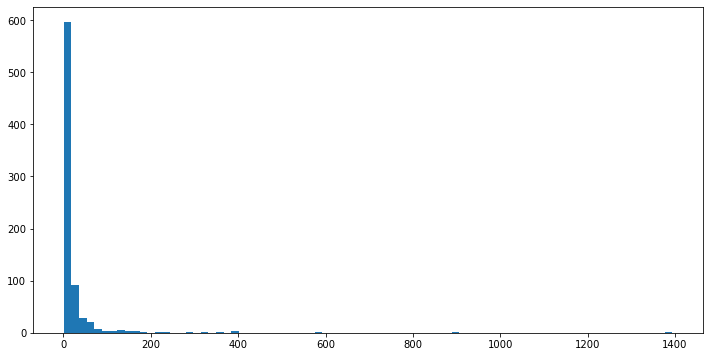

In [44]:
plt.figure(figsize=(12,6))
plt.hist(ratings['num of people rated'],bins=80)
plt.show()
# xais = no of rating y = no of ratings apper

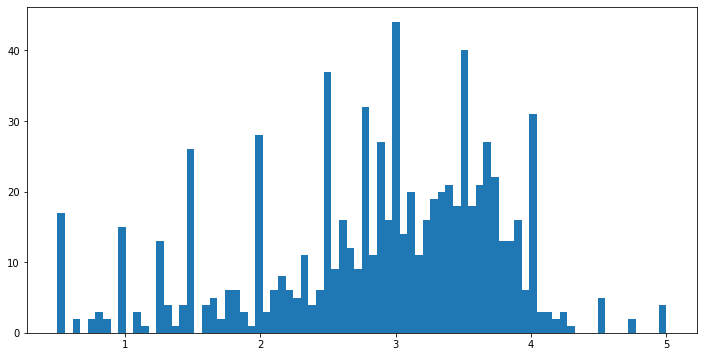

In [45]:
plt.figure(figsize=(12,6))
plt.hist(ratings['rating'],bins=80)
plt.show()

### seaborn used for better visualization
### y axis is num of people rated the movie and on x axis each movie get rated

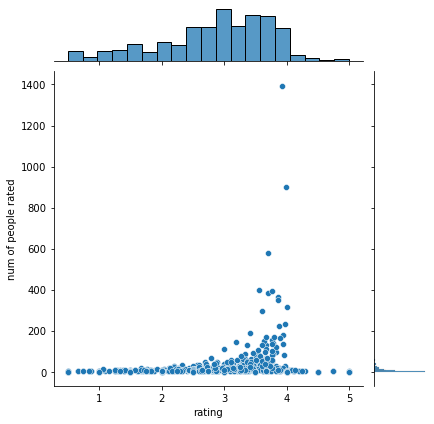

In [48]:
sns.jointplot(x='rating' ,y='num of people rated' , data= ratings, alpha=1)

## Making of movie recommendation system

### Making Matrix of user vs movie title  in which ratigs connect them

In [49]:
movie_matrix=df.pivot_table(index="user_id",columns="title", values ="rating",dropna=True)

In [ ]:
movie_matrix.head()

In [51]:
movie_rating.sort_values(by="num of people rated",ascending=False).head()

,rating,num of people rated
title,,
3 Idiots (2009),3.928623,1394
Children of Heaven The (Bacheha-Ye Aseman) (1997),3.991667,900
Namesake The (2006),3.700516,581
Bhaji on the Beach (1993),3.553030,396
PK (2014),3.762755,392


## Checking or building one example

##### Firist I am serching a movie name in the moviemat matrix then storing its all review in the khaani. 

In [52]:
idiots=movie_matrix["3 Idiots (2009)"]
idiots.head(10)

user_id
172    NaN
176    4.0
221    NaN
333    NaN
339    NaN
422    5.0
505    4.0
516    4.0
537    NaN
540    NaN
Name: 3 Idiots (2009), dtype: float64

##### Now  I am serching all the movie which are correlated with khaani on the basis of rating.
##### Now i am droping the NaN values from  data frame

In [55]:
similar_to_idiots=movie_matrix.corrwith(idiots)
similar_to_idiots.dropna(inplace=True)
print(similar_to_idiots)

title
1920 (2008)                        0.397467
1920: Evil Returns (2012)          1.000000
1942: A Love Story (1994)         -0.727607
2 States (2014)                    0.466137
3 Idiots (2009)                    1.000000
                                     ...   
Zakhm (1998)                      -1.000000
Zameen (2003)                      0.511891
Zanjeer (1973)                     0.222222
Zeher (2005)                       1.000000
Zindagi Na Milegi Dobara (2011)    0.463296
Length: 576, dtype: float64


##### Now i am changing the correlation table to a data frame

In [56]:
cor_idiots=pd.DataFrame(similar_to_idiots,columns=['correlation'])
cor_idiots.head()

,correlation
title,
1920 (2008),0.397467
1920: Evil Returns (2012),1.000000
1942: A Love Story (1994),-0.727607
2 States (2014),0.466137
3 Idiots (2009),1.000000


##### shorting the row in descending order

In [57]:
cor_idiots.sort_values('correlation',ascending=False).head(10)

,correlation
title,
Sehar (2005),1.0
Angry Indian Goddesses (2015),1.0
MP3: Mera Pehla Pehla Pyaar (2007),1.0
Chameli Ki Shaadi (1986),1.0
Mahakaal (The Monster) (1993),1.0
Corporate (2006),1.0
Main Tera Hero (2014),1.0
Pyaar Koi Khel Nahin (1999),1.0
Karzzzz (2008),1.0


##### I am addding num of rating in the correlation.

In [59]:
cor_idiots=cor_idiots.join(ratings['num of people rated'])
cor_idiots.head()

,correlation,num of people rated
title,,
1920 (2008),0.397467,10
1920: Evil Returns (2012),1.000000,5
1942: A Love Story (1994),-0.727607,5
2 States (2014),0.466137,16
3 Idiots (2009),1.000000,1394


###### Here we are getting all the correlation with khani which have rated more than  30  people

In [63]:
cor_idiots[cor_idiots['num of people rated']>50].sort_values('correlation',ascending=False)

,correlation,num of people rated
title,,
3 Idiots (2009),1.000000,1394
Drishyam (2015),0.853069,68
Baby (2015),0.750492,58
Airlift (2016),0.697758,64
OMG Oh My God! (2012),0.694439,81
...,...,...
Fire (1996),0.173461,152
Something Is Happening (Kuch Kuch Hota Hai) (1998),0.161331,100
Vicky Donor (2012),0.159965,64


### **Here I am making funcation which can do the all operation in the**

In [72]:
def predict_movies(movie_name):
    movie_user_rating=movie_matrix[movie_name]
    similar_to_movie=movie_matrix.corrwith(movie_user_rating)
    
    corr_movie=pd.DataFrame(similar_to_movie,columns=["Correlation"])
    corr_movie.dropna(inplace=True)
    
    corr_movie=corr_movie.join(movie_rating['num of people rated'])
    prediction=pd.DataFrame(corr_movie[corr_movie['num of people rated']>50].sort_values('Correlation',ascending=False))
       
    
    return prediction.head(11)

#### Checking a example

In [73]:
prediction=predict_movies("Wanted (2009)")
prediction.head()

C:\Users\ravis\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\ravis\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation,num of people rated
title,,
Wanted (2009),1.000000,187
Band Baaja Baaraat (2010),0.761881,74
My Name is Khan (2010),0.730017,295
Chennai Express (2013),0.726333,66
OMG Oh My God! (2012),0.725176,81


##  <span style="color:red">**Making a Gui Application**</span>

In [74]:
root=tk.Tk()
name_of_movie=tk.StringVar()

### Here we are creating a window when user press submit button

In [75]:
def submit():
    name=name_of_movie.get()
    root1=tk.Tk()
    root1.title("MOVIE RECOMDATE")
    big_frame=tk.Frame(root1)
    big_frame.pack(fill='both', expand=True)
    
    lis=tk.Message(big_frame,text=predict_movies(name),font=("Comic Sans MS",10,"bold"),bg="orange",fg="red")
    
    lis.pack(side="top",fill='both', expand=True)
    print(pd.DataFrame(predict_movies(name)))
    root1.geometry('500x500')
    
    root1.mainloop()
    name_of_movie.set("")

### Here we are designing the primary window

In [76]:
name_label=tk.Label(root,text="Enter Movie Name",font=("Comic Sans MS",12,"bold"),bg="blue2")
name_entry=tk.Entry(root,textvariable=name_of_movie,font=("calibre",10,"bold"))
sub_btn=tk.Button(root,text = 'Submit', command = submit,bg="red",fg="yellow")


In [77]:
name_label.grid(row=0,column=1)
name_entry.grid(row=0,column=2)
sub_btn.grid(row=3,column=2)

### Result will be displaying on console as well as on window.

In [78]:
root.title("MOVIE RECOMDATION ")
root.configure(bg="green2")
root.geometry('600x300')
root.mainloop()

C:\Users\ravis\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\ravis\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\ravis\anaconda3\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\ravis\anaconda3\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


                                                    Correlation  \
title                                                             
Bandit Queen (1994)                                    1.000000   
Drishyam (2015)                                        1.000000   
3 Idiots (2009)                                        0.853069   
Marriage Made in Heaven  A (Rab Ne Bana Di Jodi...     0.852726   
Baby (2015)                                            0.844868   
Paint It Yellow (Rang De Basanti) (2006)               0.814139   
Ghajini (2008)                                         0.811422   
Don 2 (2011)                                           0.808574   
Children of Heaven  The (Bacheha-Ye Aseman) (1997)     0.806159   
Like Stars on Earth (Taare Zameen Par) (2007)          0.800834   
Kahaani (2012)                                         0.784924   

                                                    num of people rated  
title                                                 